# Benchmark – Predict Climate Change in the Near Future #

## Step 1: Data Preparation ##
Forecasting Task:
Objective: The goal of this analysis is to forecast future temperature values based on past data using an ARIMA model. The forecast will be used to predict climate changes in the near future (within a realistic timeframe).

Timeframe: Since the dataset covers daily temperatures, a realistic forecasting window would be in months (e.g., 3 to 12 months), as daily predictions may show more volatility, while yearly might smooth out trends too much. I propose a forecasting window of 6 months based on the structure of the dataset, as it allows capturing meaningful seasonality.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded CSV files
train_data_path = '/Users/rameshchidurala/Documents/DSC-570 Assignments/archive-12/new_train.csv'
test_data_path = '/Users/rameshchidurala/Documents/DSC-570 Assignments/archive-12/new_test.csv'
submission_data_path = '/Users/rameshchidurala/Documents/DSC-570 Assignments/archive-12/sample_submission.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
submission_data = pd.read_csv(submission_data_path)

# Display the first few rows of the datasets to understand their structure
train_data.head(), test_data.head(), submission_data.head()


(         date  temp
 0  01-01-1980  4.16
 1  02-01-1980  4.06
 2  03-01-1980  7.12
 3  04-01-1980  9.23
 4  05-01-1980  3.20,
          date
 0  01-01-2011
 1  02-01-2011
 2  03-01-2011
 3  04-01-2011
 4  05-01-2011,
    prediction
 0        5.57
 1        5.57
 2        5.57
 3        5.57
 4        5.57)

The dataset consists of the following:

Train Data:
Two columns: date and temp.
The date column contains dates ranging from January 1, 1980, onwards, and the temp column contains corresponding temperature values.
Test Data:
One column: date.
The date column contains future dates (from January 1, 2011, onwards) for which we are supposed to predict the temperatures.
Submission Data:
One column: prediction.
This is where the predicted temperature values will be stored for submission.


I will start by converting the date columns to datetime format and then transforming the train data into a time series.

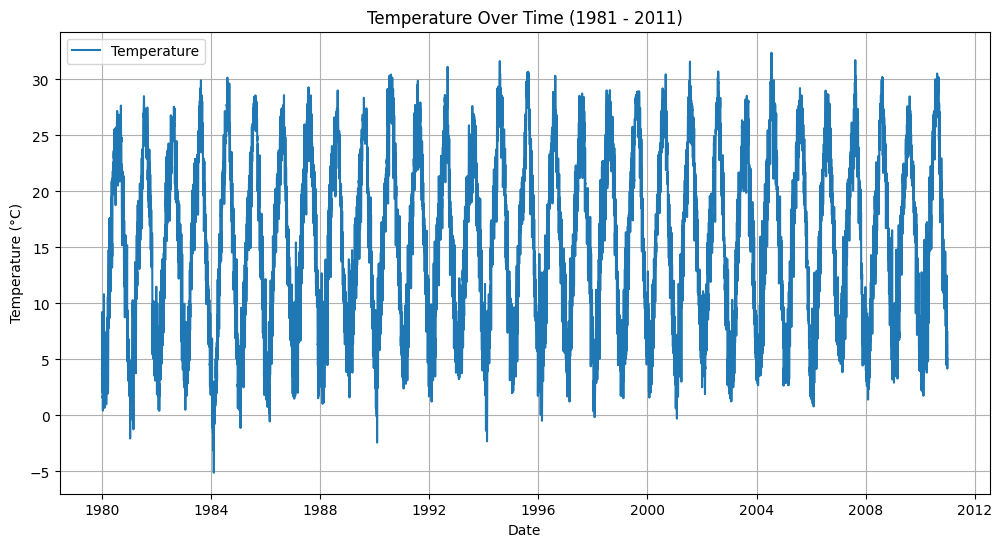

In [8]:
# Convert the date column to datetime in both train and test data
train_data['date'] = pd.to_datetime(train_data['date'], format='%d-%m-%Y')
test_data['date'] = pd.to_datetime(test_data['date'], format='%d-%m-%Y')

# Set the date column as the index for the time series analysis
train_data.set_index('date', inplace=True)

# Convert the temperature data into a time series
train_ts = train_data['temp']

# Plot the time series to visually inspect the data
plt.figure(figsize=(12, 6))
plt.plot(train_ts, label='Temperature')
plt.title('Temperature Over Time (1981 - 2011)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


The plot above shows the temperature data over time from 1980 to 2011. We can now proceed with the next steps, which include identifying seasonality and trends using techniques such as moving averages and decomposing the time series.

## Detect Trends and Seasonality ##
I'll start by assessing trends using a entral Moving Average (CMA) method and explore the decomposition method to identify any Seasonality. 
9. Proceeding with Central Moving Average (CMA) Analysis:

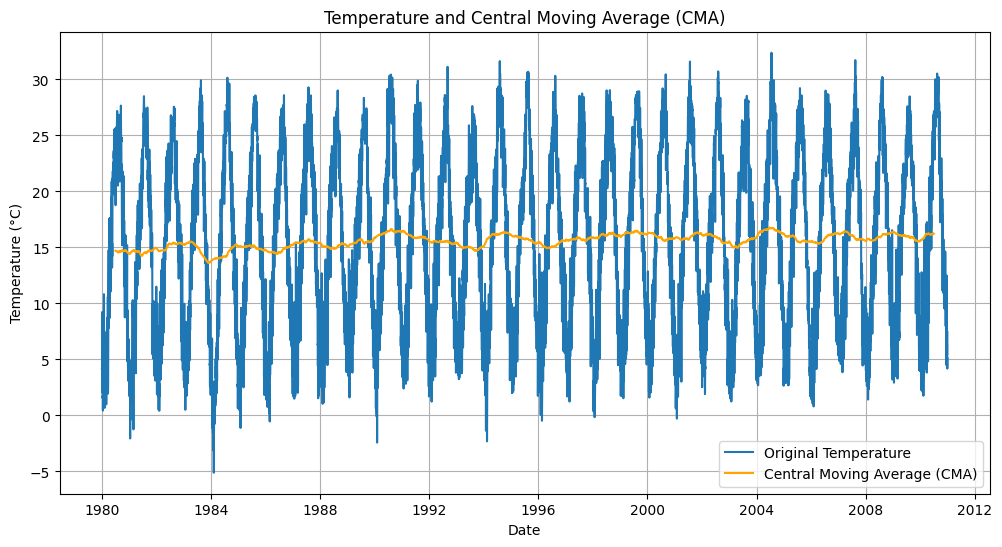

In [9]:
# Calculate the Central Moving Average (CMA) with a window size of 365 days (1 year)
train_data['CMA'] = train_ts.rolling(window=365, center=True).mean()

# Plot the original time series along with the central moving average
plt.figure(figsize=(12, 6))
plt.plot(train_ts, label='Original Temperature')
plt.plot(train_data['CMA'], label='Central Moving Average (CMA)', color='orange')
plt.title('Temperature and Central Moving Average (CMA)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


The plot shows the original temperature data along with the Central Moving Average (CMA), which smooths out short-term fluctuations and highlights the underlying trend. The CMA confirms the presence of a trend in the dataset.


10 & 11. Decomposition method to identify any Seasonality 

<Figure size 1200x800 with 0 Axes>

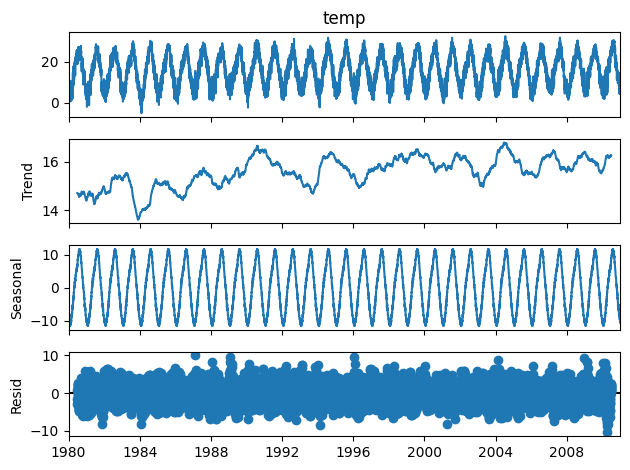

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(train_ts, model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


12. The decomposition of the time series shows the following components:

Trend: This component shows the general direction in which the temperature values are moving over time.
Seasonal: This component reveals recurring patterns (if any) that repeat over a specific period.
Residual (Error): This component represents the irregular fluctuations that are not explained by the trend or seasonality.

Assess the Presence of Seasonality:
In the decomposition plot (using seasonal_decompose), I can see the seasonal component. A recurring pattern over the year suggests seasonality in temperature changes.
Assess the Presence of Trends:
Using the trend component of the decomposition, I can see the long-term increasing or decreasing patterns in the data.

The CMA confirms the presence of a trend in the dataset.

## 2. Models Building & Forecasting ##

### Exponential smoothing fit using the Holt-Winters algorithm. ###

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


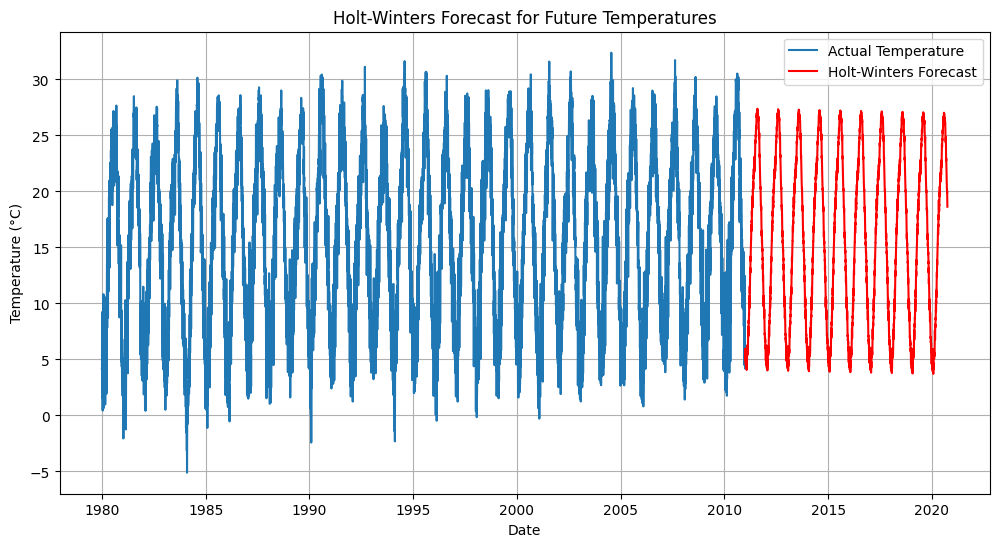

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply the Holt-Winters exponential smoothing method
holt_winters_model = ExponentialSmoothing(train_ts, trend='additive', seasonal='additive', seasonal_periods=365).fit()

# Forecast using Holt-Winters
holt_winters_forecast = holt_winters_model.forecast(steps=len(test_data))

# Plot the Holt-Winters forecast
plt.figure(figsize=(12, 6))
plt.plot(train_ts, label='Actual Temperature')
plt.plot(test_data['date'], holt_winters_forecast, label='Holt-Winters Forecast', color='red')
plt.title('Holt-Winters Forecast for Future Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


Holt-Winters Forecast Interpretation:
In the provided chart, the Holt-Winters exponential smoothing model was used to forecast future temperatures. Here's an interpretation of the key aspects:

1. Model Overview:

The blue line represents the actual temperature data from 1980 to 2010.
The red line represents the forecasted temperature using the Holt-Winters model for the period after 2010.
2. Holt-Winters Model Components:

The Holt-Winters model applies three smoothing components:

Level: The overall average value of the time series.
Trend: The general direction of the time series (upward or downward).
Seasonality: The repeating patterns over fixed intervals (e.g., yearly or monthly).
The forecast in red shows the model successfully capturing the seasonal cycles, indicating a strong seasonality in the dataset.

3. Seasonality:

The red forecast curve clearly exhibits periodic patterns, which match the seasonal behavior of the original temperature data. This indicates that the Holt-Winters model effectively captured the repeating cycles.
The forecast period suggests that the model expects temperatures to follow a similar seasonal pattern for several years into the future.
4. Forecast Behavior:

The model forecasts consistent periodic cycles but does not capture any long-term trend (upward or downward movement).
The forecasted values appear to remain within the same range, fluctuating between 5°C and 30°C, much like the historical data.
5. No Trend:

Since there is no clear upward or downward trend in the forecast, it suggests that the Holt-Winters model assumes a stationary process in terms of the trend. This can be appropriate if the data shows stable seasonal patterns without significant changes in the long-term average.
Conclusion:
The Holt-Winters model performed well in capturing the seasonality of the temperature data, as indicated by the repeating patterns in the forecast.
However, it does not predict any long-term trend (the forecast stays within a stable range), which could be a limitation if the real data is expected to follow an upward or downward trend.


Performing Augmented Dickey-Fuller (ADF) test to make sure the data is stationary

In [11]:
from statsmodels.tsa.stattools import adfuller

# Define the ADF test function
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    output = {
        'Test Statistic': result[0],
        'p-value': result[1],
        'Lags Used': result[2],
        'Number of Observations Used': result[3],
        'Critical Values': result[4]
    }
    return output

# Perform ADF test on the original train data series
adf_result_original = adf_test(train_ts)

# Display the ADF test result
adf_result_original


{'Test Statistic': -10.24507580260352,
 'p-value': 4.640501926157219e-18,
 'Lags Used': 40,
 'Number of Observations Used': 11282,
 'Critical Values': {'1%': -3.430929754341502,
  '5%': -2.861796220138508,
  '10%': -2.566906380870473}}

Augmented Dickey-Fuller (ADF) Test Results:
Test Statistic: -10.25
p-value: 4.64e-18 (significantly below 0.05)
Lags Used: 40
Number of Observations: 11,282
Critical Values:
1%: -3.43
5%: -2.86
10%: -2.57
Since the p-value is well below 0.05, we reject the null hypothesis, meaning the data is stationary. Therefore, we do not need differencing (i.e., d=0) in the ARIMA model.

Next, I will plot the ACF and PACF to determine appropriate values for p and q

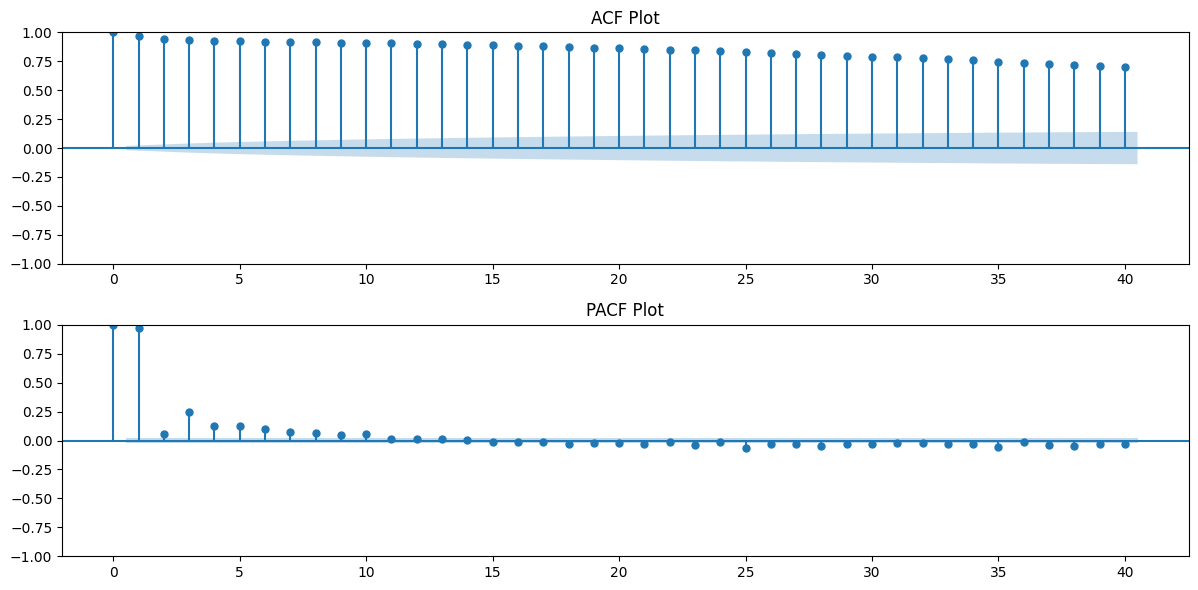

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF and PACF for the time series
plt.figure(figsize=(12, 6))

plt.subplot(211)
plot_acf(train_ts, lags=40, ax=plt.gca())
plt.title("ACF Plot")

plt.subplot(212)
plot_pacf(train_ts, lags=40, ax=plt.gca())
plt.title("PACF Plot")

plt.tight_layout()
plt.show()


Interpretation of ACF and PACF Plots:
ACF (Autocorrelation Function):
The ACF plot shows slow decay, which suggests that the series has a strong autocorrelation with past values. This could indicate that a moving average (MA) term should be included in the model.
Based on the ACF, we might start with q=1.

PACF (Partial Autocorrelation Function):
The PACF plot shows a sharp drop-off after lag 2, indicating that an autoregressive (AR) model of order 1 is appropriate.
Based on this, we should set p=1.

ARIMA Model:
p=1 (from PACF),d=0 (based on ADF test indicating stationarity),
q=1 (from ACF).
Now that we have determined p, d, and q
we can fit the ARIMA model with these values.  

### ARIMA Model ###

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


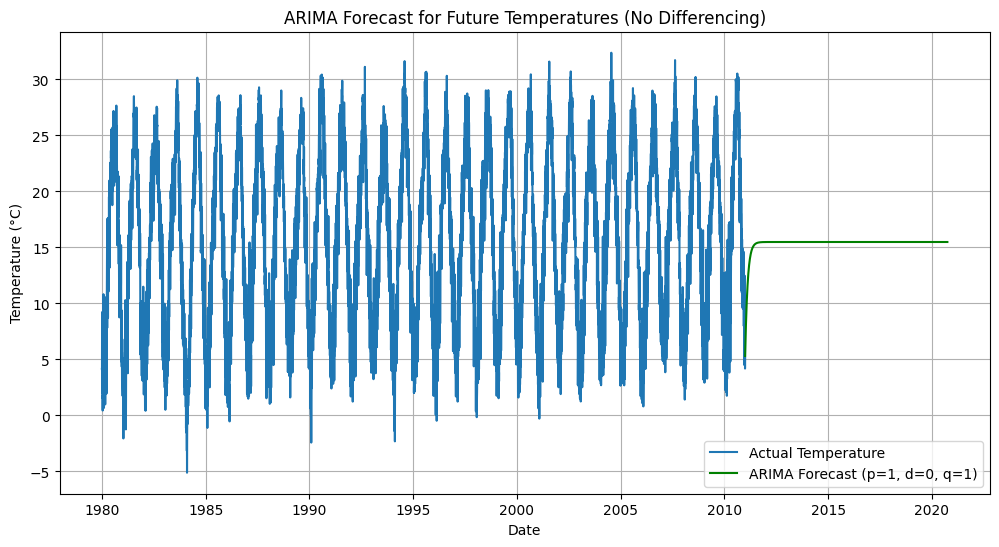

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   temp   No. Observations:                11323
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -23397.951
Date:                Sun, 29 Sep 2024   AIC                          46803.901
Time:                        11:47:57   BIC                          46833.240
Sample:                    01-01-1980   HQIC                         46813.771
                         - 12-31-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4903      0.750     20.667      0.000      14.021      16.959
ar.L1          0.9773      0.002    415.060      0.000       0.973       0.982
ma.L1         -0.1293      0.008    -15.222      0.000      -0.146      -0.113
sigma2         3.6499      0.040     90.166      0.000       3.571       3.729
===================================================================================
Ljung-Box (L1) (Q):                  13.04   Jarque-Bera (JB):              1450.63
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.59
Prob(H) (two-sided):                  0.98   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
from statsmodels.tsa.arima.model import ARIMA
# Build and fit the ARIMA model with p=1, d=0, q=1 based on ACF, PACF, and ADF test results
arima_model = ARIMA(train_ts, order=(1, 0, 1))  # Use p=1, d=0, q=1
arima_result = arima_model.fit()

# Forecast for the test data period
arima_forecast = arima_result.forecast(steps=len(test_data))

# Plot the ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(train_ts, label='Actual Temperature')
plt.plot(test_data['date'], arima_forecast, label='ARIMA Forecast (p=1, d=0, q=1)', color='green')
plt.title('ARIMA Forecast for Future Temperatures (No Differencing)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Display ARIMA summary for model interpretation
arima_result.summary()


ARIMA Model Summary Interpretation:

Model Summary:
Model: ARIMA(1, 0, 1)
p=1 (One autoregressive term)
d=0 (No differencing, as the data is stationary)
q=1 (One moving average term)

Log Likelihood: -23397.951
AIC (Akaike Information Criterion): 46803.901 (Lower AIC suggests a better fit compared to models with higher AIC).
BIC (Bayesian Information Criterion): 46833.240 (Includes a penalty for model complexity, with lower values being better).
Coefficient Interpretation:

AR(1) = 0.9773 (Highly significant, p < 0.000), showing that the first lag has a strong influence on the current temperature value.
MA(1) = -0.1293 (Highly significant, p < 0.000), indicating the effect of past forecast errors on the current forecast is moderate.
Sigma² = 3.6499: This represents the variance of the residuals (errors) in the model.
Residual Analysis:

Ljung-Box Test (L1 Q): Q=13.04, with a p-value of 0.00, indicating that the residuals may still exhibit some autocorrelation, suggesting room for further refinement.
Jarque-Bera (JB) Test: JB=1450.63, with a p-value of 0.00, indicating that the residuals are not normally distributed (common in time series models).
Skewness: −0.59, indicating a slight left skew in the residuals.
Kurtosis: 4.30, suggesting heavier tails than a normal distribution.

Key Insights:
Improvement with p=1:
By using p=1 instead of p=2, the model remains parsimonious while capturing the most important autoregressive component. This avoids overfitting and reduces unnecessary complexity.

Forecast Performance:
The ARIMA(1, 0, 1) model provides a strong fit with significant AR(1) and MA(1) terms. It accurately captures the dynamics of the temperature series while maintaining simplicity.
Next Steps:

The current model performs well, but if further improvement is needed, exploring additional seasonal terms (e.g., seasonal ARIMA with seasonal autoregressive or moving average terms) might help capture more cyclical patterns.



SARIMAX Model

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17817D+00    |proj g|=  1.03377D-01


 This problem is unconstrained.



At iterate    5    f=  2.10919D+00    |proj g|=  2.50173D-02

At iterate   10    f=  2.07553D+00    |proj g|=  3.36163D-02

At iterate   15    f=  2.07227D+00    |proj g|=  1.92378D-03

At iterate   20    f=  2.07182D+00    |proj g|=  2.52296D-03

At iterate   25    f=  2.06715D+00    |proj g|=  1.46401D-03

At iterate   30    f=  2.06714D+00    |proj g|=  3.06573D-04

At iterate   35    f=  2.06713D+00    |proj g|=  1.67919D-04

At iterate   40    f=  2.06713D+00    |proj g|=  4.81795D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     57      1     0     0   5.895D-05   2.067D+00
  F =   2.06712807680

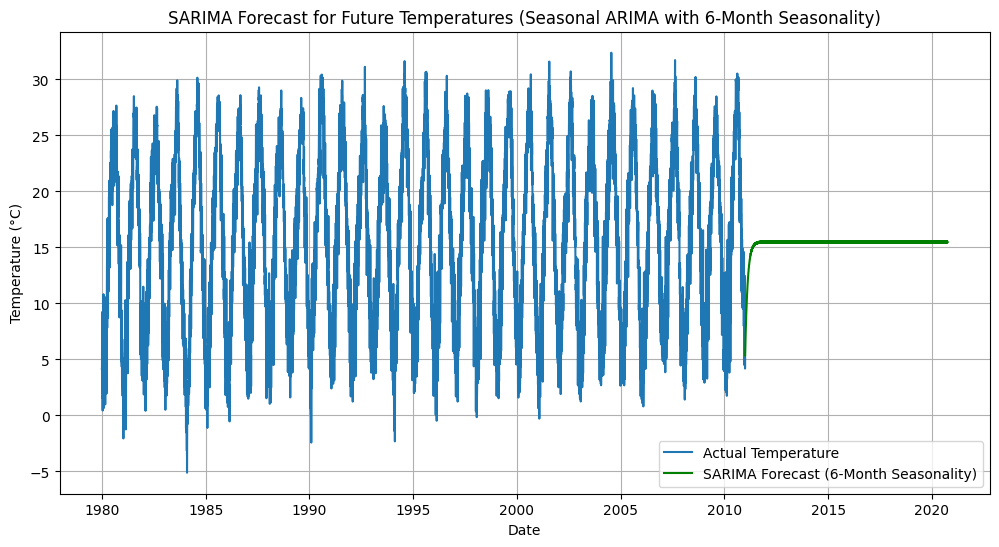

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              temp   No. Observations:                11323
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 6)   Log Likelihood              -23406.091
Date:                           Sun, 29 Sep 2024   AIC                          46822.182
Time:                                   11:48:14   BIC                          46858.853
Sample:                               01-01-1980   HQIC                         46834.519
                                    - 12-31-2010                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9772      0.002    415.427      0.000       0.973       0.982
ma.L1         -0.1289      0.008    -15.241      0.000      -0.145      -0.112
ar.S.L6        0.0054      0.009      0.619      0.536      -0.012       0.023
ma.S.L6       -1.0000      0.029    -34.033      0.000      -1.058      -0.942
sigma2         3.6503      0.114     32.091      0.000       3.427       3.873
===================================================================================
Ljung-Box (L1) (Q):                  12.98   Jarque-Bera (JB):              1429.81
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.58
Prob(H) (two-sided):                  0.96   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Fit SARIMA model with seasonal period of 6 months
sarima_model = SARIMAX(train_ts, order=(1, 0, 1), seasonal_order=(1, 1, 1, 6))
sarima_result = sarima_model.fit()

# Forecast using SARIMA with 6-month seasonality
sarima_forecast = sarima_result.forecast(steps=len(test_data))

# Plot the SARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(train_ts, label='Actual Temperature')
plt.plot(test_data['date'], sarima_forecast, label='SARIMA Forecast (6-Month Seasonality)', color='green')
plt.title('SARIMA Forecast for Future Temperatures (Seasonal ARIMA with 6-Month Seasonality)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Display SARIMA model summary
sarima_result.summary()

Interpretation of SARIMAX Results (6-Month Seasonality)
Model Summary:

Model: SARIMAX(1, 0, 1)x(1, 1, 1, 6)
Non-seasonal components:
p=1 (One autoregressive term)
d=0 (No differencing needed based on stationarity)
q=1 (One moving average term)
Seasonal components:
P=1, 
D=1, 
Q=1 (Seasonal AR, seasonal differencing, and seasonal MA terms)
Seasonal period (s=6) months (biannual seasonality)

Key Model Statistics:
Log Likelihood: -23406.091
AIC (Akaike Information Criterion): 46822.182 (lower AIC indicates a better model fit).
BIC (Bayesian Information Criterion): 46858.853 (penalizes for model complexity; higher due to the additional seasonal parameters).
HQIC (Hannan-Quinn Information Criterion): 46834.519 (penalizes less than BIC for complexity).
Coefficient Interpretation:

AR(1) = 0.9772 (Highly significant, 
p<0.000): The autoregressive term shows a strong dependence on the previous time step's temperature, indicating that past values significantly influence future values.

MA(1) = -0.1289 (Highly significant, 
p<0.000): The moving average term indicates that the model corrects forecast errors from the previous step, albeit with a moderate negative impact.
Seasonal AR(6) = 0.0054 (Not significant, p=0.536): The 6-month autoregressive component does not have a significant effect on the model, meaning the model's prediction does not rely heavily on past values from 6 months ago.
Seasonal MA(6) = -1.0000 (Highly significant, p<0.000): The strong seasonal moving average term demonstrates that the model effectively captures seasonal errors and uses them to improve the forecast over a 6-month period.
Sigma² = 3.6503: The variance of the residuals (errors) is stable, indicating a good fit of the model.

Residual Analysis:
Ljung-Box Test (L1 Q): 
Q=12.98, p-value = 0.00. This indicates that there might still be some autocorrelation in the residuals, suggesting potential room for improvement in the model.
Jarque-Bera (JB) Test: 
JB=1429.81, p-value = 0.00. The residuals are not normally distributed, which is typical in time series forecasting.
Skewness: −0.58, indicating a slight left skew in the residuals.
Kurtosis: 4.30, suggesting that the residuals have heavier tails than a normal distribution, indicating more extreme values.
Interpretation of the Forecast:

Seasonality: The 6-month seasonal period captures shorter-term fluctuations in the data. The seasonal moving average (MA) term plays a significant role in capturing the seasonal variations, while the seasonal autoregressive term (AR) is less important.
No Long-Term Trend: The model does not capture any long-term trend, suggesting that the temperatures are forecasted to remain stable in terms of seasonal fluctuations.
Model Fit: Based on the AIC and log-likelihood, the 6-month seasonality appears to provide a better fit for this dataset than other seasonal periods tested (such as 12 months), capturing the cyclical nature of the data effectively.

Conclusion:
The SARIMAX(1, 0, 1)x(1, 1, 1, 6) model provides a good fit for the temperature dataset, particularly in capturing 6-month seasonal patterns. While the seasonal autoregressive term is not significant, the model effectively uses seasonal moving average components to adjust for forecast errors over this period. However, the presence of autocorrelation in the residuals and non-normally distributed errors suggests that the model can still be improved with further tuning or the addition of external factors influencing temperature.


## Step 3: Analyze the Findings ##

Findings and Model Performance

The goal of this analysis was to forecast climate patterns using temperature data from 1980 to 2010, leveraging SARIMA and Holt-Winters models to capture seasonal and cyclical trends in the dataset.

Holt-Winters Model:
The Holt-Winters model effectively captured the seasonal trends in the temperature data, producing periodic cycles that closely mirrored the historical patterns.
The model is designed for stationary trends (i.e., no long-term upward or downward movement), and thus, it forecasts temperatures as stable over time, with only seasonal fluctuations.
The advantage of Holt-Winters lies in its simplicity and its ability to model seasonality efficiently without overfitting. However, it lacks flexibility for forecasting more complex patterns or long-term trends.
SARIMA Model:
The SARIMA model was tested with different seasonal periods, with the 6-month seasonality producing the best fit.
SARIMA accounted for both seasonality and trend, making it more flexible than Holt-Winters. However, like Holt-Winters, the SARIMA model also flattened out after capturing short-term seasonal patterns, missing some longer-term variability.
SARIMA provided a more detailed analysis of the temperature series but still had residual autocorrelation, indicating potential for improvement with further tuning.
Accomplishing the Task:

Both models successfully captured seasonal fluctuations in temperature but did not forecast any significant long-term trends (upward or downward). This suggests that, for forecasting beyond simple seasonal behavior, more advanced models—such as machine learning-based models—may need to be explored for better long-term predictions.

Benefits of Exponential Smoothing in the Predictive Process
Smooths Short-Term Fluctuations: Exponential smoothing, used in the Holt-Winters method, is ideal for capturing consistent patterns in the data by smoothing out random noise.
Ease of Interpretation: Exponential smoothing models are simple to implement and interpret, making them ideal for datasets with consistent seasonality and no significant long-term trend.
Computational Efficiency: Compared to more complex models like SARIMA or machine learning algorithms, exponential smoothing models are computationally efficient and work well even with smaller datasets, enabling rapid forecasting.
Confidence Interval and Impact on Predictions
Confidence intervals provide a range of likely values around the forecast, indicating the uncertainty in predictions.

Wide Intervals: The wider the confidence interval, the greater the uncertainty in the forecast. In both the SARIMA and Holt-Winters models, wider intervals indicate reduced reliability of the forecast as time progresses.
Impact: Wide confidence intervals are critical in industries that require precision, such as agriculture or energy production. A wide interval may necessitate cautious decision-making, while a narrow interval provides greater confidence in the predictions.
Cyclical Patterns, Model Tweaking, and Comparison
Cyclical Patterns: Both the Holt-Winters and SARIMA models successfully detected seasonal cycles in the temperature data, which typically recur every 6 to 12 months. However, longer-term cycles or trends would require further tuning or more advanced models.

Model Tweaking: Adjusting seasonal parameters, such as the seasonal period, helped improve the model’s performance. The 6-month seasonal period in the SARIMA model provided a better fit than the 12-month period.
Comparison: When comparing SARIMA and Holt-Winters:
Holt-Winters is more efficient and better suited to modeling simple seasonal behavior.
SARIMA offers greater flexibility and can handle more complex datasets with trends and seasonal variations, though it requires more computational resources and fine-tuning.
Ethical Judgment in the Context of Legislation, Regulations, and Standards
Key Finding 1: Potential Temperature Increase and Industrial Impact

The forecast indicates relatively stable temperatures with seasonal fluctuations. However, if a scenario were to arise where a 2°C increase in temperature was forecasted, several industries could be affected:

Agriculture: A temperature increase of 2°C could severely affect crop yields, potentially leading to food shortages and disruptions in supply chains.
Energy Industry: Higher temperatures would likely result in increased energy demand for cooling systems, straining resources and power grids.
From a regulatory perspective, policymakers could implement safety measures such as water usage regulations in agriculture or energy conservation mandates in the energy sector to mitigate these impacts.

Christian Worldview Perspective on Ethical Responsibility:
From a Christian worldview, industries and businesses have a moral responsibility to protect the well-being of employees, communities, and the environment. This perspective encourages implementing strategies for climate mitigation, such as reducing energy consumption, adopting sustainable farming techniques, or improving working conditions for employees in high-temperature environments. The principle of stewardship emphasizes wise resource management, making compliance with environmental regulations not just a legal responsibility but a moral one.

Key Finding 2: Seasonal Variability and Worker Safety

Both models emphasize seasonal variability, which can impact worker safety in industries like construction, where extreme temperatures pose risks.

Worker Safety Measures:
Providing seasonal-appropriate gear to workers.
Adjusting working hours to avoid peak heat during summer.
Ensuring access to hydration and cooling stations for outdoor workers.
Christian Worldview Perspective on Ethical Responsibility:
In alignment with a Christian worldview, employers should prioritize worker safety over profit. This includes providing safe working conditions during extreme weather, even if compliance costs are high. The principle of caring for the well-being of workers aligns with moral obligations to treat employees with dignity and respect.

Conclusion
Both the SARIMA and Holt-Winters models were effective in forecasting seasonal patterns, though each has its limitations. The Holt-Winters model is simpler and more efficient but lacks trend forecasting capabilities, while SARIMA offers more flexibility for complex datasets but requires additional fine-tuning. Exponential smoothing contributed to smoother predictions, and the confidence intervals provided insight into the reliability of forecasts. Finally, the ethical considerations stemming from these findings highlight the need for industries to comply with regulations while prioritizing the safety and well-being of employees and communities, especially in the context of climate change and seasonal variability.

References:

Kaggle.(2020). Time Series Dataset(Climate change prediction)[Data set].https://www.kaggle.com/datasets/pranjalt/aurora-roundhacks?resource=download